In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
warnings.filterwarnings("ignore")

# **Original Data Overview**

In [ ]:
# local path to the dataset
df = pd.read_csv('./thyroidDF.csv')

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            

In [ ]:
df.shape

(9172, 31)

In [ ]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [ ]:
df.isnull().sum()

,0
age,0
sex,307
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


In [ ]:
# all numeric imput 0 for false
# sex data - median

# **DATA CLEANING**

**Converting Sex column to categorical**

In [ ]:
#gender
gender_map={}
gender_count = 1
for val in df['sex'].unique():
    if not(pd.isna(val)):
        print(val)
        if val not in gender_map.keys() :
            gender_map[val] = gender_count
            gender_count = gender_count+1
print(gender_map)

F
M
{'F': 1, 'M': 2}


In [ ]:
df['sex'] = df['sex'].apply(lambda x: gender_map[x] if not pd.isna(x) else x)

In [ ]:
df['sex'].unique()

array([ 1.,  2., nan])

**Imputing missing values in sex column with median value**

In [ ]:
median = df['sex'].median()

# Fill NaN values in the 'sex' column with the median value
df['sex'] = df['sex'].fillna(median)

In [ ]:
reverse_gender_map = {v: k for k, v in gender_map.items()}
df['sex'] = df['sex'].apply(lambda x: reverse_gender_map[x])

In [ ]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

**Filling the numeric missing values with 0**

In [ ]:
df.replace("", np.nan, inplace=True)
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_meds,0
sick,0
pregnant,0
thyroid_surgery,0
I131_treatment,0
query_hypothyroid,0


**Dropping insignificant columns**

In [ ]:
df.drop(columns=["patient_id","referral_source"],axis=1, inplace=True)

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.0,f,0.0,f,0.0,f,0.0,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,0.0,f,0.0,f,0.0,-
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,36.0,S


**Handling outliers using z score**

In [ ]:


from collections import defaultdict
cols = df.select_dtypes(include=['float']).columns #array of all numerical rows. this method is better than hardcoding it

count_map = defaultdict(dict) #creating a dict to keep count of the number of replaced values

def get_z(col):
    mean = sum(col) / len(col)

    #std deviation
    variance = sum((x - mean) ** 2 for x in col) / len(col)
    std_dev = variance ** 0.5

    z_scores = [(x - mean) / std_dev for x in col]

    return z_scores

#usually the accepted values is mean +- 2(std deviation), so lets set threshhhold as 3
thresh = 3

for col in cols:
    z = get_z(df[col])
    med = df[col].median()

    for i, score in enumerate(z):
        if abs(score) > thresh:
            if col not in count_map.keys():
                count_map[col] = 1
            else:
                count_map[col] = count_map[col] + 1
            df.loc[i, col] = med

print("Count of replaced outliers in each column",count_map)
df.head()

Count of replaced outliers in each column defaultdict(<class 'dict'>, {'TSH': 102, 'T3': 70, 'TT4': 75, 'T4U': 17, 'FTI': 68, 'TBG': 235})


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,0.0,f,0.0,f,0.0,f,0.0,f,0.0,-
1,29,F,f,f,f,f,f,f,f,f,...,1.9,t,128.0,f,0.0,f,0.0,f,0.0,-
2,41,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,0.0,-
4,32,F,f,f,f,f,f,f,f,f,...,0.0,f,0.0,f,0.0,f,0.0,t,0.0,S


    Mapping of the target column with the disease inference


    Hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    Hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    Binding protein:

    I   increased binding protein
    J   decreased binding protein

    General health:

    K   concurrent non-thyroidal illness

    Replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    Antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    Miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


    Based on the above categorization, we are grouping the target column into 8 groups which are:
    1. Hypothyroid conditions
    2. Hypothyroid conditions
    3. Negative

In [ ]:
df["target"].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

# Hypothyroidism and Thyroid Function Tests

## Notes
- **RST**: Drop all zeroes.
- **IJ**: Only one value.
- **O**: 4 F values, total = 14 (hyperthyroidism).
- **P**: All T values, total = 5 (hyperthyroidism).
- **Q**: All T values, total = 14 (hyperthyroidism).
- **Replacement Therapy**: Hypothyroidism.
- **TSH Levels**:
  - If TSH is high: The patient may be under-replaced (hypothyroidism).
  - If TSH is low: The patient may be over-replaced (hyperthyroidism).
  - **Normal Range**: Typically around 0.4 - 4.0 mIU/L, but the exact range can vary slightly depending on the lab.
- **K**: Negative.
- **Concurrent Non-Thyroidal Illness (NTI)**: Also known as euthyroid sick syndrome, refers to abnormalities in thyroid function tests that occur in patients with a serious illness not directly related to the thyroid gland. Even though the thyroid function tests may be abnormal, the thyroid gland itself is not the primary cause of the issue.


In [ ]:
df = df.loc[~df["target"].isin(["R","S","T","I","J"])]

In [ ]:
map = {"Hyperthyroid" : ["A","B","C","D","N","O","P","Q","AK","C|I","OI","D|R"],"Hypothyroid" : ["E","F","G","H","L","M","MK","LJ","H|K","GK","MI","FK","GI","GKJ"],"Negative" : ["-","K","KJ"]}

In [ ]:
for key,value in map.items():
  for val in value:
    df["target"].replace(val,key,inplace=True)

In [ ]:
df["target"].unique()

array(['Negative', 'Hypothyroid', 'Hyperthyroid'], dtype=object)

#**EDA** <br> Distribution of Target

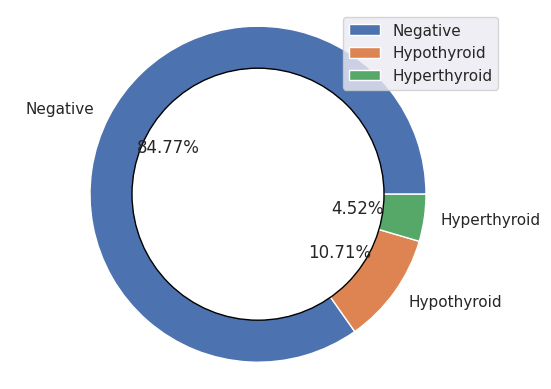

In [ ]:
labels = df["target"].value_counts().index

plt.pie(df["target"].value_counts(), labels=labels, autopct='%.2f%%')
plt.axis('equal')
plt.legend(labels)
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='White', edgecolor='black')
plt.gca().add_artist(circle)
plt.show()


**dropping inconsequential columns**

In [ ]:
# dropping inconsequential columns
df.drop(columns=["TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"],axis=1, inplace=True)

**encoding the string columns**

In [ ]:
# encoding the string columns
df["on_thyroxine"].replace("t",True, inplace=True)
df["on_thyroxine"].replace("f",False, inplace=True)

df["query_on_thyroxine"].replace("t",True, inplace=True)
df["query_on_thyroxine"].replace("f",False, inplace=True)

df["on_antithyroid_meds"].replace("t",True, inplace=True)
df["on_antithyroid_meds"].replace("f",False, inplace=True)

df["sick"].replace("t",True, inplace=True)
df["sick"].replace("f",False, inplace=True)

df["pregnant"].replace("t",True, inplace=True)
df["pregnant"].replace("f",False, inplace=True)

df["thyroid_surgery"].replace("t",True, inplace=True)
df["thyroid_surgery"].replace("f",False, inplace=True)

df["I131_treatment"].replace("t",True, inplace=True)
df["I131_treatment"].replace("f",False, inplace=True)

df["query_hypothyroid"].replace("t",True, inplace=True)
df["query_hypothyroid"].replace("f",False, inplace=True)

df["query_hyperthyroid"].replace("t",True, inplace=True)
df["query_hyperthyroid"].replace("f",False, inplace=True)

df["lithium"].replace("t",True, inplace=True)
df["lithium"].replace("f",False, inplace=True)

df["goitre"].replace("t",True, inplace=True)
df["goitre"].replace("f",False, inplace=True)

df["tumor"].replace("t",True, inplace=True)
df["tumor"].replace("f",False, inplace=True)

df["hypopituitary"].replace("t",True, inplace=True)
df["hypopituitary"].replace("f",False, inplace=True)

df["psych"].replace("t",True, inplace=True)
df["psych"].replace("f",False, inplace=True)



**one hot encoding of the target column**

In [ ]:
# one hot encoding of the target column
df = pd.get_dummies(df,columns=["target","sex"])
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,T3,TT4,T4U,FTI,TBG,target_Hyperthyroid,target_Hypothyroid,target_Negative,sex_F,sex_M
0,29,False,False,False,False,False,False,False,True,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False
1,29,False,False,False,False,False,False,False,False,False,...,1.9,128.0,0.0,0.0,0.0,False,False,True,True,False
2,41,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.0,0.0,11.0,False,False,True,True,False
3,36,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False
5,60,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False


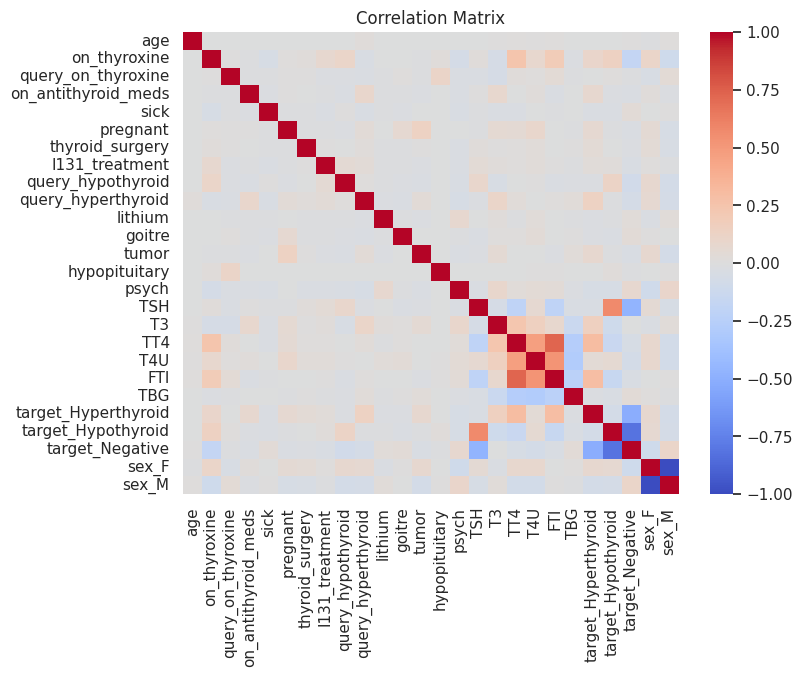

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# after analysing the correlation matrix, we are dropping the not related columns
df.drop(columns=["age","query_on_thyroxine","sick","thyroid_surgery","I131_treatment","lithium","goitre","tumor","hypopituitary"],axis=1, inplace=True)

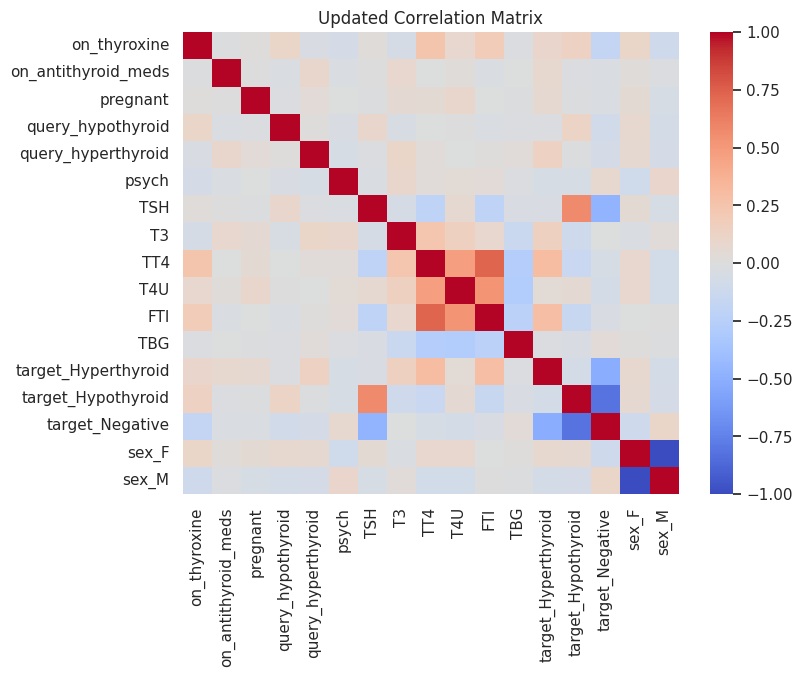

In [ ]:
# updated corr matrix

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.title("Updated Correlation Matrix")
plt.show()

In [ ]:
df.describe()

,TSH,T3,TT4,T4U,FTI,TBG
count,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000
mean,2.855447,1.356922,100.474065,0.880071,101.524356,0.233664
std,6.771410,1.017801,37.348123,0.309657,43.182149,2.083411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,84.000000,0.820000,88.000000,0.000000
50%,1.200000,1.600000,101.000000,0.940000,106.000000,0.000000
75%,2.500000,2.100000,120.000000,1.040000,124.000000,0.000000
max,74.000000,4.900000,233.000000,1.860000,256.000000,22.000000


In [ ]:
# normalizing the numeric values (for the downstream models)
features = df.select_dtypes(include=np.number).columns
for feature in features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    df[feature] = (df[feature] - min_val) / (max_val - min_val)

In [ ]:
df.describe()

,TSH,T3,TT4,T4U,FTI,TBG
count,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000,8515.000000
mean,0.038587,0.276923,0.431219,0.473156,0.396580,0.010621
std,0.091506,0.207714,0.160292,0.166482,0.168680,0.094701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003378,0.000000,0.360515,0.440860,0.343750,0.000000
50%,0.016216,0.326531,0.433476,0.505376,0.414062,0.000000
75%,0.033784,0.428571,0.515021,0.559140,0.484375,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


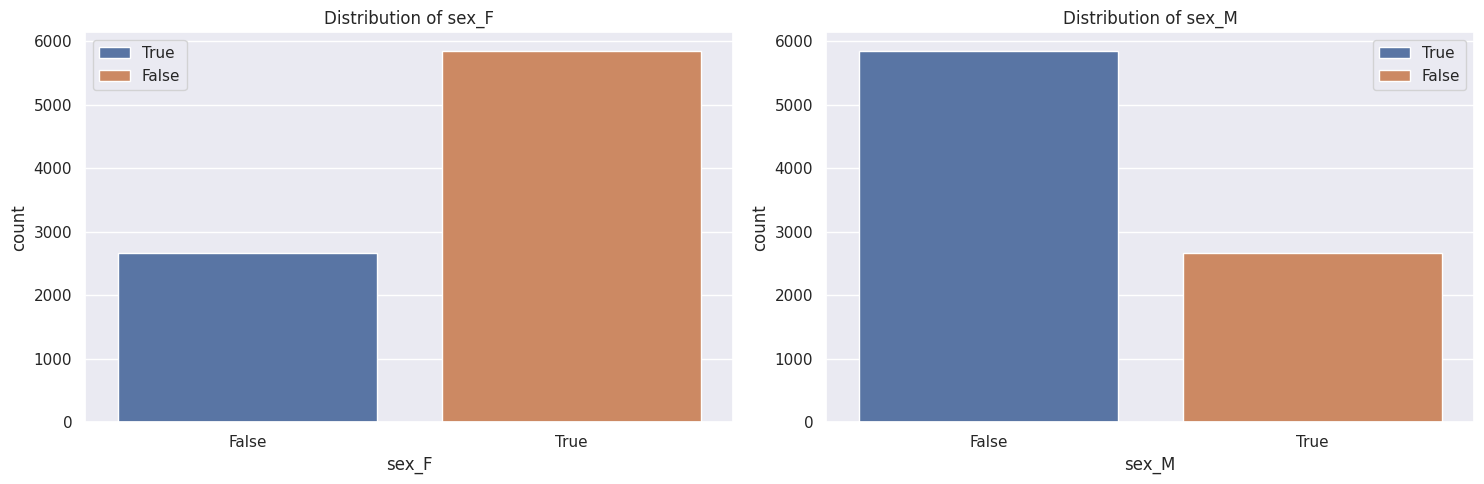

In [ ]:
labels = ['True', 'False']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sex_F', hue='sex_F', alpha=1)
plt.title('Distribution of sex_F')
plt.legend(labels)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='sex_M', hue='sex_M', alpha=1)
plt.title('Distribution of sex_M')
plt.legend(labels)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

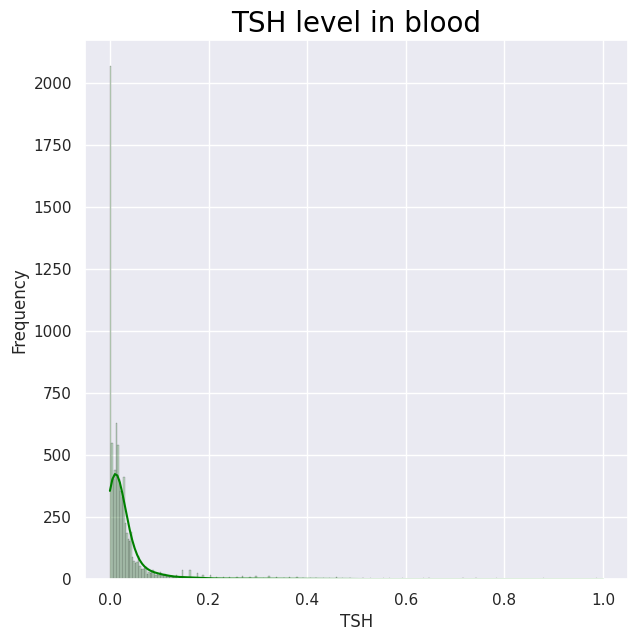

In [ ]:
plt.figure(figsize=(7, 7))

sns.histplot(df['TSH'], kde=True, color='green', edgecolor='black',alpha=0.2)
plt.title('TSH level in blood', color='black', fontsize=20)
plt.xlabel('TSH')
plt.ylabel('Frequency')

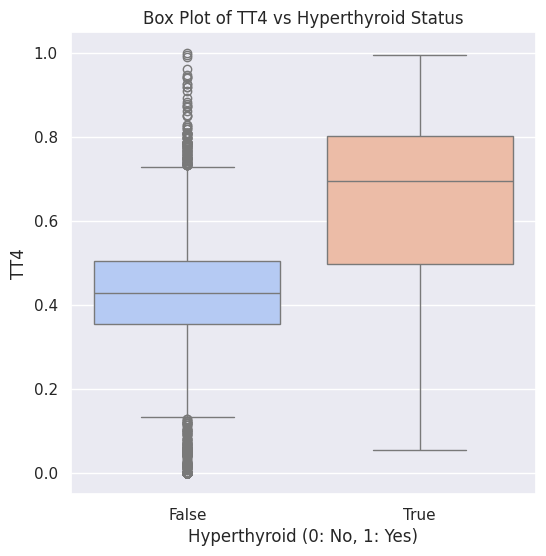

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for FTI vs target_hypothyroid
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['target_Hyperthyroid'], y=df['TT4'], palette='coolwarm')

# Add labels and title
plt.xlabel('Hyperthyroid (0: No, 1: Yes)')
plt.ylabel('TT4')
plt.title('Box Plot of TT4 vs Hyperthyroid Status')

# Show plot
plt.show()


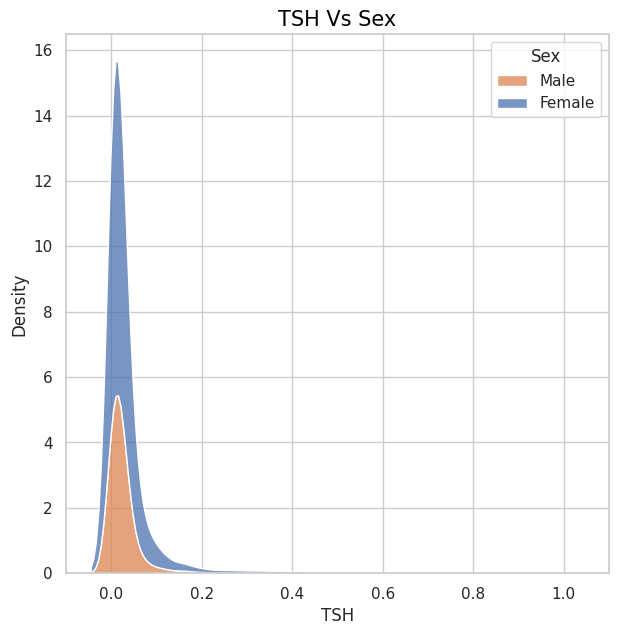

In [ ]:
plt.figure(figsize=(7, 7))
sns.set(style='whitegrid')

# TSH Vs Sex
sns.kdeplot(data=df, x="TSH", hue="sex_M", multiple="stack", fill=True)
plt.title("TSH Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])


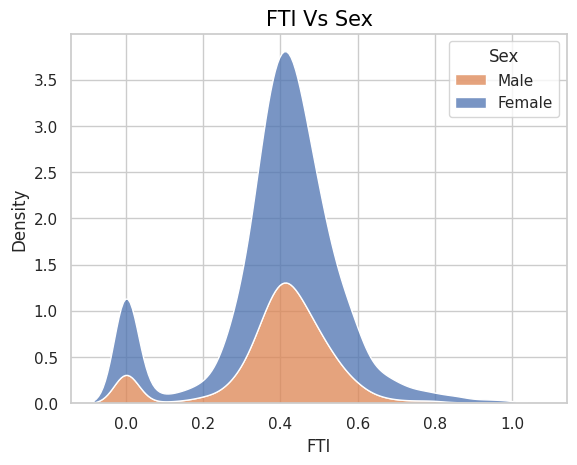

In [ ]:
sns.kdeplot(data=df, x='FTI', hue="sex_M", multiple="stack", fill=True)
plt.title("FTI Vs Sex", fontsize=15, color='black')
plt.legend(title='Sex', labels=['Male', 'Female'])
# plt.xlabel()